# Contour Overlay 

## Imports 
* _numpy_ for array math
* _astropy.io_ for reading and writing FITS cubes and images
* _matplotlib.pyplot_ for plotting spectra and images.

In [1]:
from astropy.io import fits
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

## Read in data cube
Read in NIRSpec IFU data cube from Box.   This particular example is a simulated quasar + host galaxy.

In [2]:
BoxPath='https://data.science.stsci.edu/redirect/JWST/jwst-data_analysis_tools/cube_fitting/Q3D_20200407/'
fname='Q3D_NRS_491_s3d.fits'
filename=BoxPath+fname
hdul1=fits.open(filename)
hdul1.info()

with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist["SCI"].data


Filename: /Users/javerbukh/.astropy/cache/download/py3/c8280408aa82d1c95e0fe27f5f82f3d6
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     296   ()      
  1  SCI           1 ImageHDU        63   (46, 48, 3915)   float32   
  2  ERR           1 ImageHDU        12   (46, 48, 3915)   float32   
  3  DQ            1 ImageHDU        12   (46, 48, 3915)   int32 (rescales to uint32)   
  4  WMAP          1 ImageHDU        10   (46, 48, 3915)   float32   
  5  ASDF          1 BinTableHDU     11   1R x 1C   [9911B]   


## Sum over spectral axis

This could be any derivative data product of the same shape as the spatial dimensions of the cube (emission line flux, equivalent width, velocity map, etc...). Here we are doing one of the simplest operations - a sum, for illustrative purposes

In [3]:
cube_sum=np.sum(sci, axis=0)

## Generate contours
User-specified contour levels in specified units. Custom colors are important, but could be added at a later stage if technically complicated.  Logarithmic and linear spacing options to auto-generate contours would be nice.

In [4]:
min_level=np.min(cube_sum)
max_level=np.max(cube_sum)
level_colors=['blue', 'purple','red', 'magenta']
contour_levels=[max_level/10000., max_level/1000., max_level/100., max_level/10.]

## Display image and overlay contours

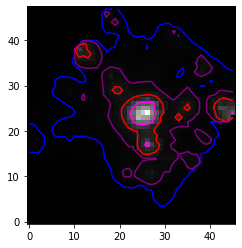

In [5]:
ax = plt.subplots()[1]

#Image normalization
norm = ImageNormalize(stretch=SqrtStretch())

#Display image
ax.imshow(cube_sum, cmap='gray', origin='lower', norm=norm)

#Overlay contours
ax.contour(cube_sum, levels=contour_levels, colors=level_colors)


In [6]:
contour_levels

[736.72665, 7367.2665, 73672.665, 736726.65]

In [7]:
from jdaviz.app import Application
from glue.core import Data
app = Application(configuration='cubeviz')
data = app.load_data(filename)
app

/Users/javerbukh/Documents/jdadf_notebooks/glue/glue/external/echo/__init__.py:3: UserWarning: glue.external.echo is deprecated, import from echo directly instead
  warnings.warn('glue.external.echo is deprecated, import from echo directly instead')


Application(components={'g-viewer-tab': '<template>\n  <component :is="stack.container">\n    <g-viewer-tab\n …

In [8]:
app.load_data("/Users/javerbukh/Documents/manga-7495-12704-LOGCUBE_fixed.fits")

IORegistryError: Format could not be identified based on the file name or contents, please provide a 'format' argument.
The available formats are:
  Format   Read Write Auto-identify
---------- ---- ----- -------------
      casa  Yes    No           Yes
casa_image  Yes    No            No
 class_lmv  Yes    No            No
      fits  Yes   Yes           Yes
       lmv  Yes    No           Yes